In [2]:
import matplotlib.pyplot as plt
import csv
import requests
import json
import pandas as pd

<h1> Analítica De Datos ( Walter Hugo Arboleda ) - PREICA2401B020063 </h1>
<h3> S30 - Evidencia de aprendizaje Clases, Objetos y archivos de datos en Python </h3>
<h3> Estudiante: Sergio Andres Rios Gomez </h3>

<h1> 1. Encapsulamiento. </h1>
<h4>Operador de Desempaquetado (*):</h4>
<p> El operador de desempaquetado (*) se utiliza para extraer elementos de un iterable en una lista de variables separadas. En este caso, lo usamos para extraer los valores de x de la lista args en variables separadas x1, x2, etc. Esto nos permite utilizar los valores de x de forma individual en la función graficar_polinomio. </p>
<p> El encapsulamiento y el operador de desempaquetado son herramientas útiles para crear código modular y reutilizable. En el caso de graficar polinomios, el encapsulamiento nos permite separar la lógica de graficar del código de la interfaz de usuario, mientras que el operador de desempaquetado nos facilita el acceso a los valores de los parámetros del usuario. </p>

In [3]:
# Grafica un polinomio de la forma ax^n.
def graficar_polinomio(a, n):
    x = range(-10, 11)
    y = [a * pow(x_val, n) for x_val in x]  # Calcular valores de y para cada valor de x
    plt.plot(x, y)  # Graficar la curva
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Polinomio: {a}x^{n}')
    plt.show()

# Interfaz de usuario para graficar polinomios.
def interfaz_usuario():
    a = float(input('Ingrese el coeficiente (a): '))
    n = int(input('Ingrese el exponente (n): '))
    graficar_polinomio(a, n)

Ingrese el coeficiente (a): 2
Ingrese el exponente (n): 2


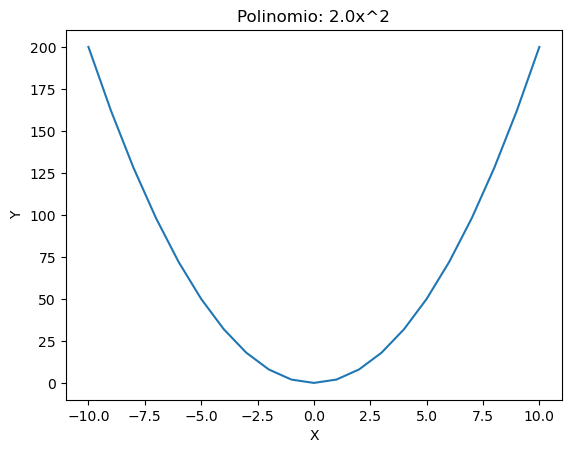

In [4]:
interfaz_usuario()

<h1> 2. Escritura de Datos en un Archivo CSV. </h1>
<p> Escribe un script que guarde una lista de listas en un archivo llamado frutas.csv </p>
<p> Se utiliza la instrucción with open para abrir el archivo instrumentos en modo escritura. El modo 'w' indica que el archivo se abrirá para escribir y se sobrescribirá cualquier contenido existente. La opción newline='' se utiliza para garantizar la compatibilidad con diferentes sistemas operativos.</p>
<p> Se crea un objeto csv.writer que se utiliza para escribir filas en el archivo CSV. Este objeto se pasa el archivo CSV abierto como argumento. </p>
<p> Se utiliza un bucle for para recorrer la lista. En cada iteración, se llama al método writerow del escritor de CSV, pasándole la sublista actual como argumento. Esto escribe la sublista como una fila separada en el archivo CSV. </p>

In [5]:
# Definir la lista de articulos musicales
instrumentos = [
    ["acordeón", "arpa", "bajo eléctrico","requinto", "piano de cola"],
    ["batería", "bongó", "castañuela", "violoncello", "tiple","violín"],
    ["flauta", "gaita", "guitarra", "kalimba", "piano"]
]

# Abrir el archivo CSV en modo escritura (w)
# newline='' se utiliza para garantizar la compatibilidad con diferentes sistemas operativos.
with open('instrumentos.csv', 'w', newline='') as archivo_csv: #==> Se utiliza la instrucción with open para abrir

    # Crear un escritor de CSV
    escritor_csv = csv.writer(archivo_csv)

    # Escribir cada sublista como una fila en el archivo CSV
    for i in instrumentos:
        escritor_csv.writerow(i)

print("¡Archivo CSV creado exitosamente!")

¡Archivo CSV creado exitosamente!


In [6]:
instrumentos

[['acordeón', 'arpa', 'bajo eléctrico', 'requinto', 'piano de cola'],
 ['batería', 'bongó', 'castañuela', 'violoncello', 'tiple', 'violín'],
 ['flauta', 'gaita', 'guitarra', 'kalimba', 'piano']]

<h1> 3. Lectura de Datos de un Archivo CSV. </h1>
<p> Escribe un script que lea los datos del archivo frutas.csv </p>
<p> Se crea un objeto csv.reader que se utiliza para leer filas del archivo CSV. Este objeto se pasa el archivo CSV abierto como argumento. </p>
<p> Se utiliza un bucle for para recorrer cada fila del archivo CSV. En cada iteración, la fila actual se almacena en la lista </p>

In [7]:
# Abrir el archivo CSV en modo lectura
with open('instrumentos.csv', 'r', newline='') as archivo_csv:

    lector_csv = csv.reader(archivo_csv)
    lista_instrumentos = []

    # Leer cada fila del archivo CSV y agregarla a la lista
    for i in lector_csv:
        lista_instrumentos.append(i)

print(lista_instrumentos)

[['acordeón', 'arpa', 'bajo eléctrico', 'requinto', 'piano de cola'], ['batería', 'bongó', 'castañuela', 'violoncello', 'tiple', 'violín'], ['flauta', 'gaita', 'guitarra', 'kalimba', 'piano']]


<h1> 4. Consumo de API publica sobre Star Wars. </h1>
<p> Para el ejercicio, hacemor USO de la API publica "https://restcountries.com/" la cual proporciona información sobre el universo de Star Wars.  </p>

In [8]:
# Función para consultar la información de una persona en la API SWAPI.
def consultar_persona(numero_persona):
    url = f"https://www.swapi.tech/api/people/{numero_persona}"
    respuesta = requests.get(url)

    if respuesta.status_code == 200:
        # Convertir la respuesta JSON en un diccionario
        datos_persona = json.loads(respuesta.content)
        # Extraer solo la información del personaje del diccionario 'result'
        return datos_persona.get('result', {}).get('properties', {})
    else:
        print(f"Error al consultar persona: {respuesta.status_code}")
        return None

In [19]:
numero_persona = int(input("Ingrese el número del personage para ver su información (entre 1 y 20): "))
datos_persona = consultar_persona(numero_persona)

Ingrese el número del personage para ver su información (entre 1 y 20): 7


In [20]:
if datos_persona:
    print(f"\nInformación de la persona {numero_persona}:")
    for clave, valor in datos_persona.items():
        print(f"  - {clave}: {valor}")


Información de la persona 7:
  - height: 165
  - mass: 75
  - hair_color: brown
  - skin_color: light
  - eye_color: blue
  - birth_year: 47BBY
  - gender: female
  - created: 2024-06-18T20:26:26.580Z
  - edited: 2024-06-18T20:26:26.580Z
  - name: Beru Whitesun lars
  - homeworld: https://www.swapi.tech/api/planets/1
  - url: https://www.swapi.tech/api/people/7
